# Alzheimer's Protein Analysis and Visualization

This notebook analyzes and visualizes the results of PyRosetta scoring for Alzheimer's-related proteins.

## Load and Examine the Data

In [11]:
# Import libraries and set up the environment
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import LinearSegmentedColormap

# Enable inline plotting for Jupyter
%matplotlib inline

# Set up the plotting style
plt.style.use('default')  # Using the default style
sns.set_theme(style="whitegrid")  # Apply Seaborn's whitegrid theme
sns.set_palette("deep")

# Increase the default figure size and set a higher DPI for sharper images
plt.rcParams['figure.figsize'] = [14, 10]
plt.rcParams['figure.dpi'] = 150


In [12]:
# Read the CSV file
df = pd.read_csv("alzheimers_protein_analysis.csv")

# Display the first few rows
print("First few rows of the dataset:")
display(df.head())

# Display basic statistics
print("\nBasic statistics of the dataset:")
display(df.describe())

First few rows of the dataset:


,Protein,PDB ID,Total,fa_atr,fa_rep,fa_sol,hbond_sc,rama_prepro
0,Amyloid-beta,1IYT,5.654692e+06,-37931.231086,1.029220e+07,29404.494178,-8.138404,660.562420
1,Tau protein,5N5A,1.741409e+07,-120627.319316,3.168264e+07,100095.126336,-61.256368,1969.346433
2,Presenilin-1,5FN2,7.462686e+03,-8077.098081,7.486665e+03,4825.256798,-15.038719,2097.609414
3,APOE4,6NCO,-1.630512e+02,-867.336869,1.713499e+02,629.071967,-21.438001,-50.682066
4,TREM2,5ELI,1.732353e+03,-1204.115570,3.334459e+03,777.320714,-13.062664,62.845492



Basic statistics of the dataset:


,Total,fa_atr,fa_rep,fa_sol,hbond_sc,rama_prepro
count,7.000000e+00,7.000000,7.000000e+00,7.000000,7.000000,7.000000
mean,3.297171e+06,-24524.107715,5.998681e+06,19658.890150,-21.133396,721.732271
std,6.571744e+06,44447.633042,1.195707e+07,36979.510894,19.956599,926.652120
min,-1.630512e+02,-120627.319316,1.713499e+02,441.268341,-61.256368,-50.682066
25%,1.111462e+03,-23004.164584,1.765463e+03,703.196341,-25.218807,49.925752
50%,1.887272e+03,-2485.734529,4.744738e+03,1439.692713,-15.038719,275.438193
75%,2.831077e+06,-1035.726220,5.149841e+06,17114.875488,-10.600534,1314.954427
max,1.741409e+07,-475.918555,3.168264e+07,100095.126336,0.000000,2097.609414


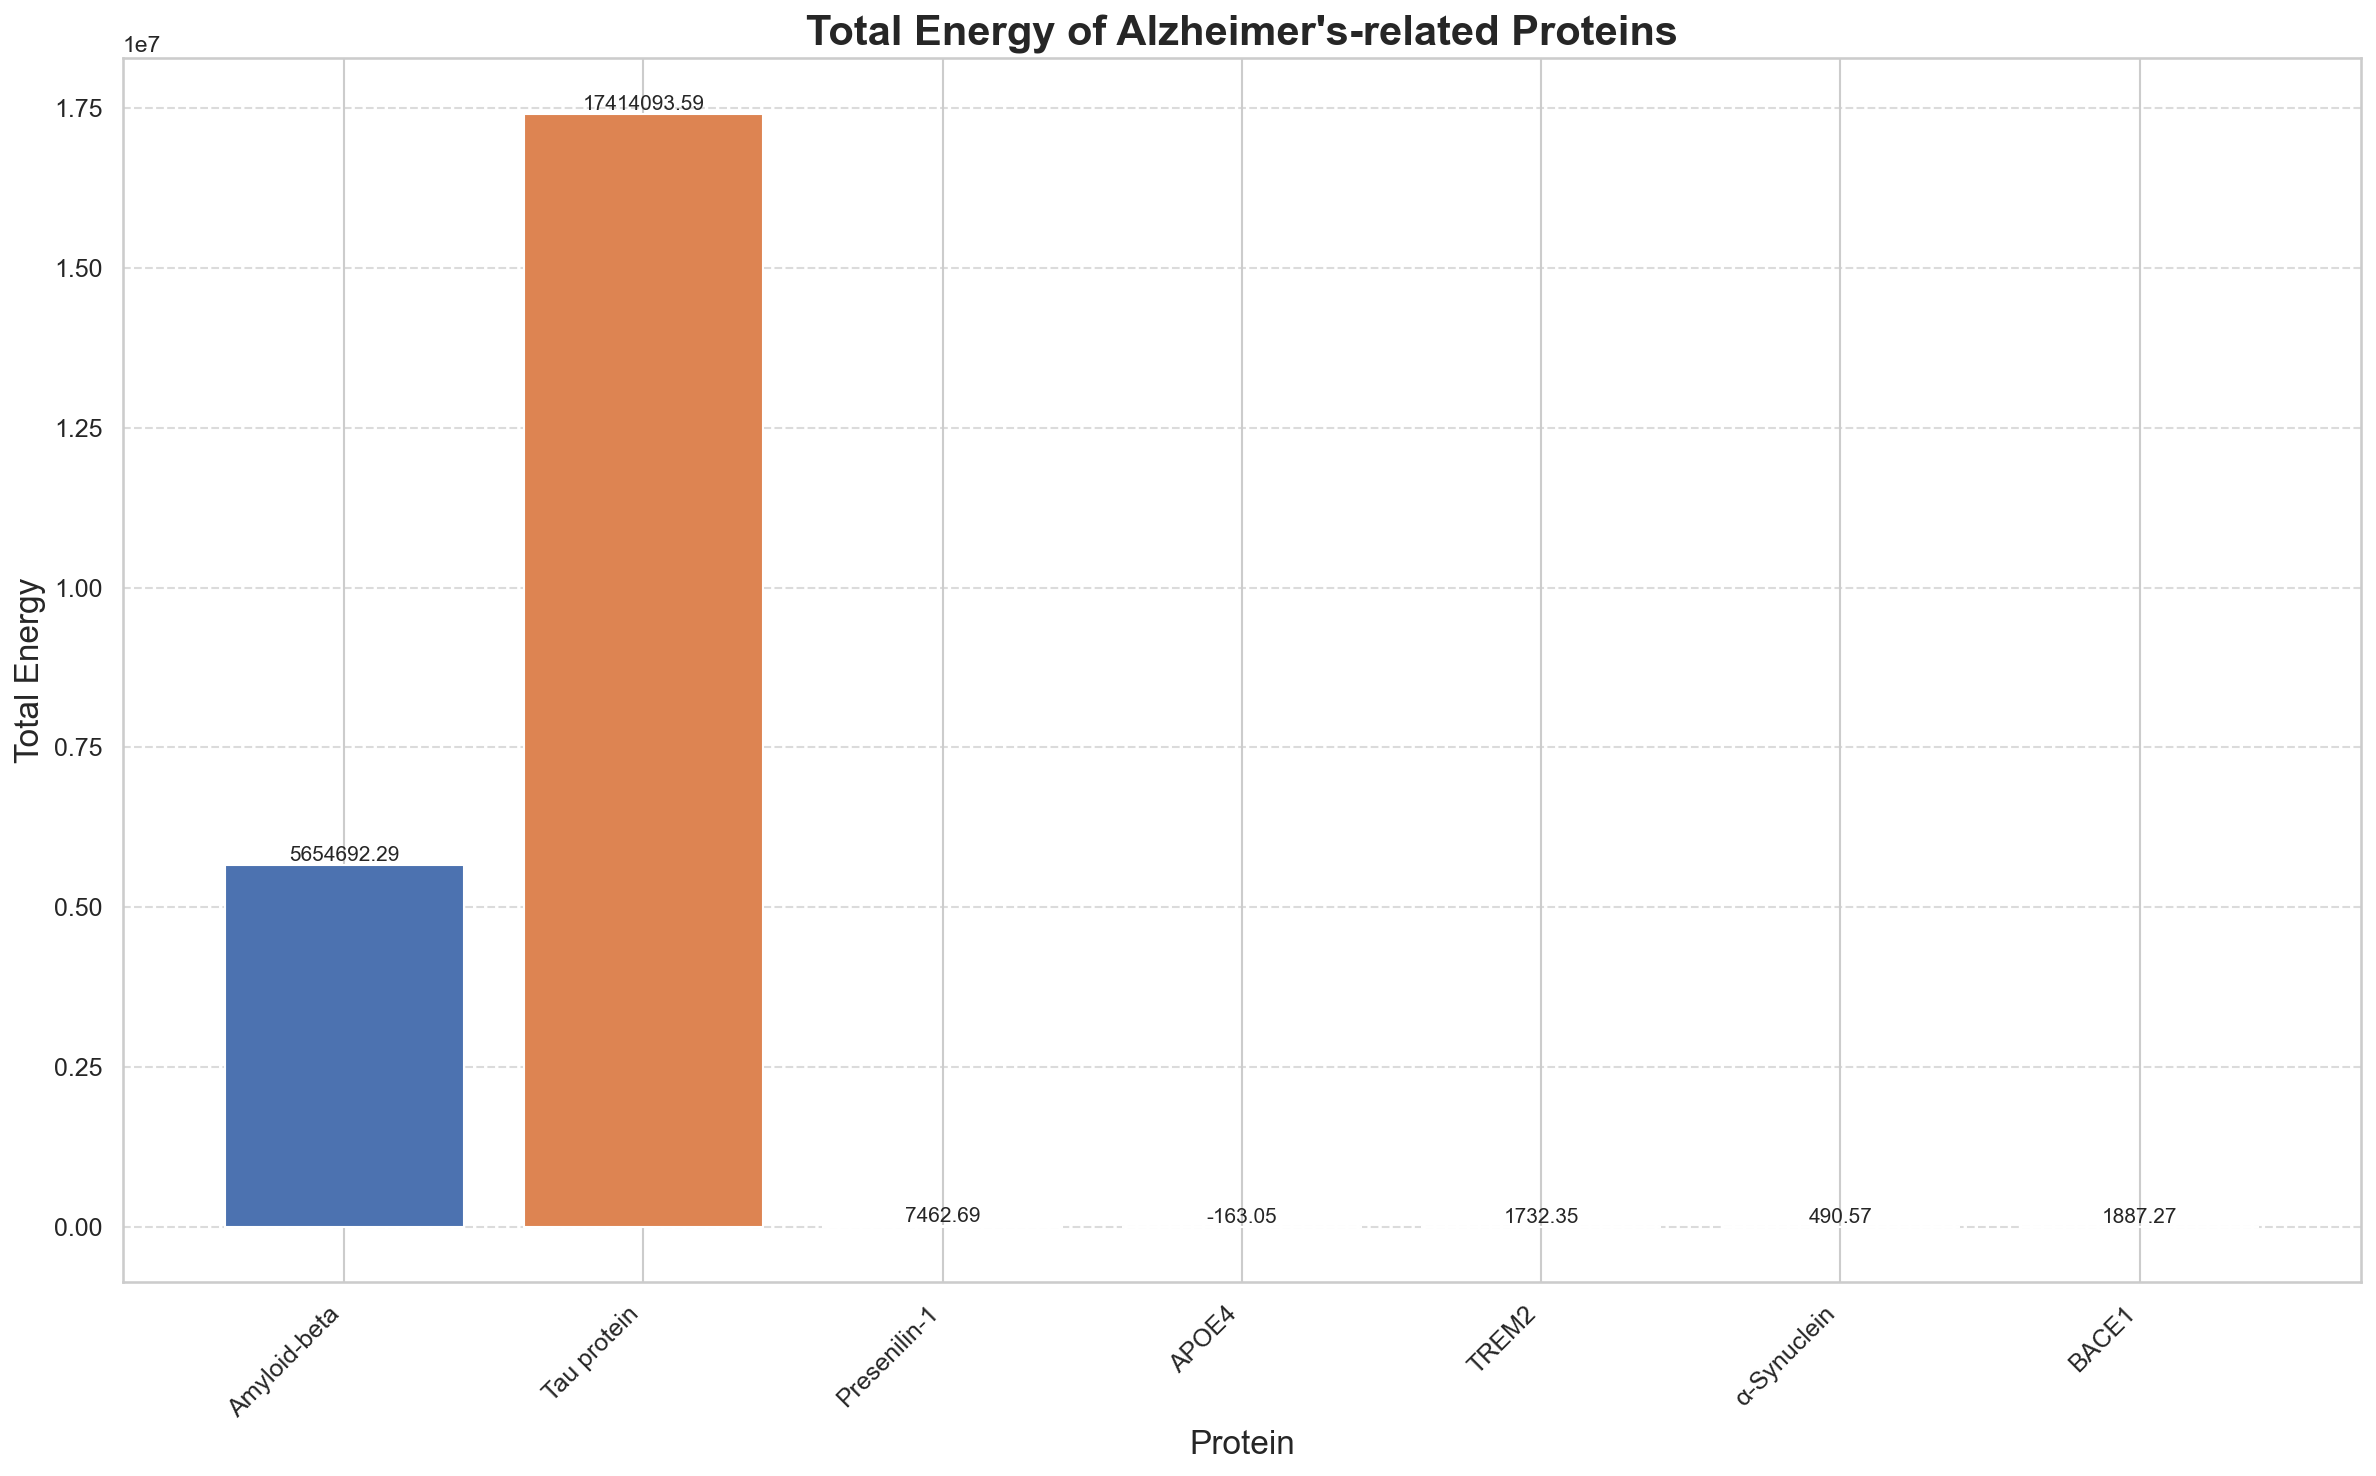

Interpretation:
This bar plot shows the total energy for each protein. Lower energy generally indicates higher stability.
[Add your specific interpretation based on the results]


In [13]:
# Total Energy Bar Plot
plt.figure(figsize=(16, 10))
bars = plt.bar(df['Protein'], df['Total'], color=sns.color_palette("deep", len(df)))
plt.title('Total Energy of Alzheimer\'s-related Proteins', fontsize=20, fontweight='bold')
plt.xlabel('Protein', fontsize=16)
plt.ylabel('Total Energy', fontsize=16)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(fontsize=12)

for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
             f'{height:.2f}',
             ha='center', va='bottom', fontsize=10)

plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

print("Interpretation:")
print("This bar plot shows the total energy for each protein. Lower energy generally indicates higher stability.")
print("[Add your specific interpretation based on the results]")


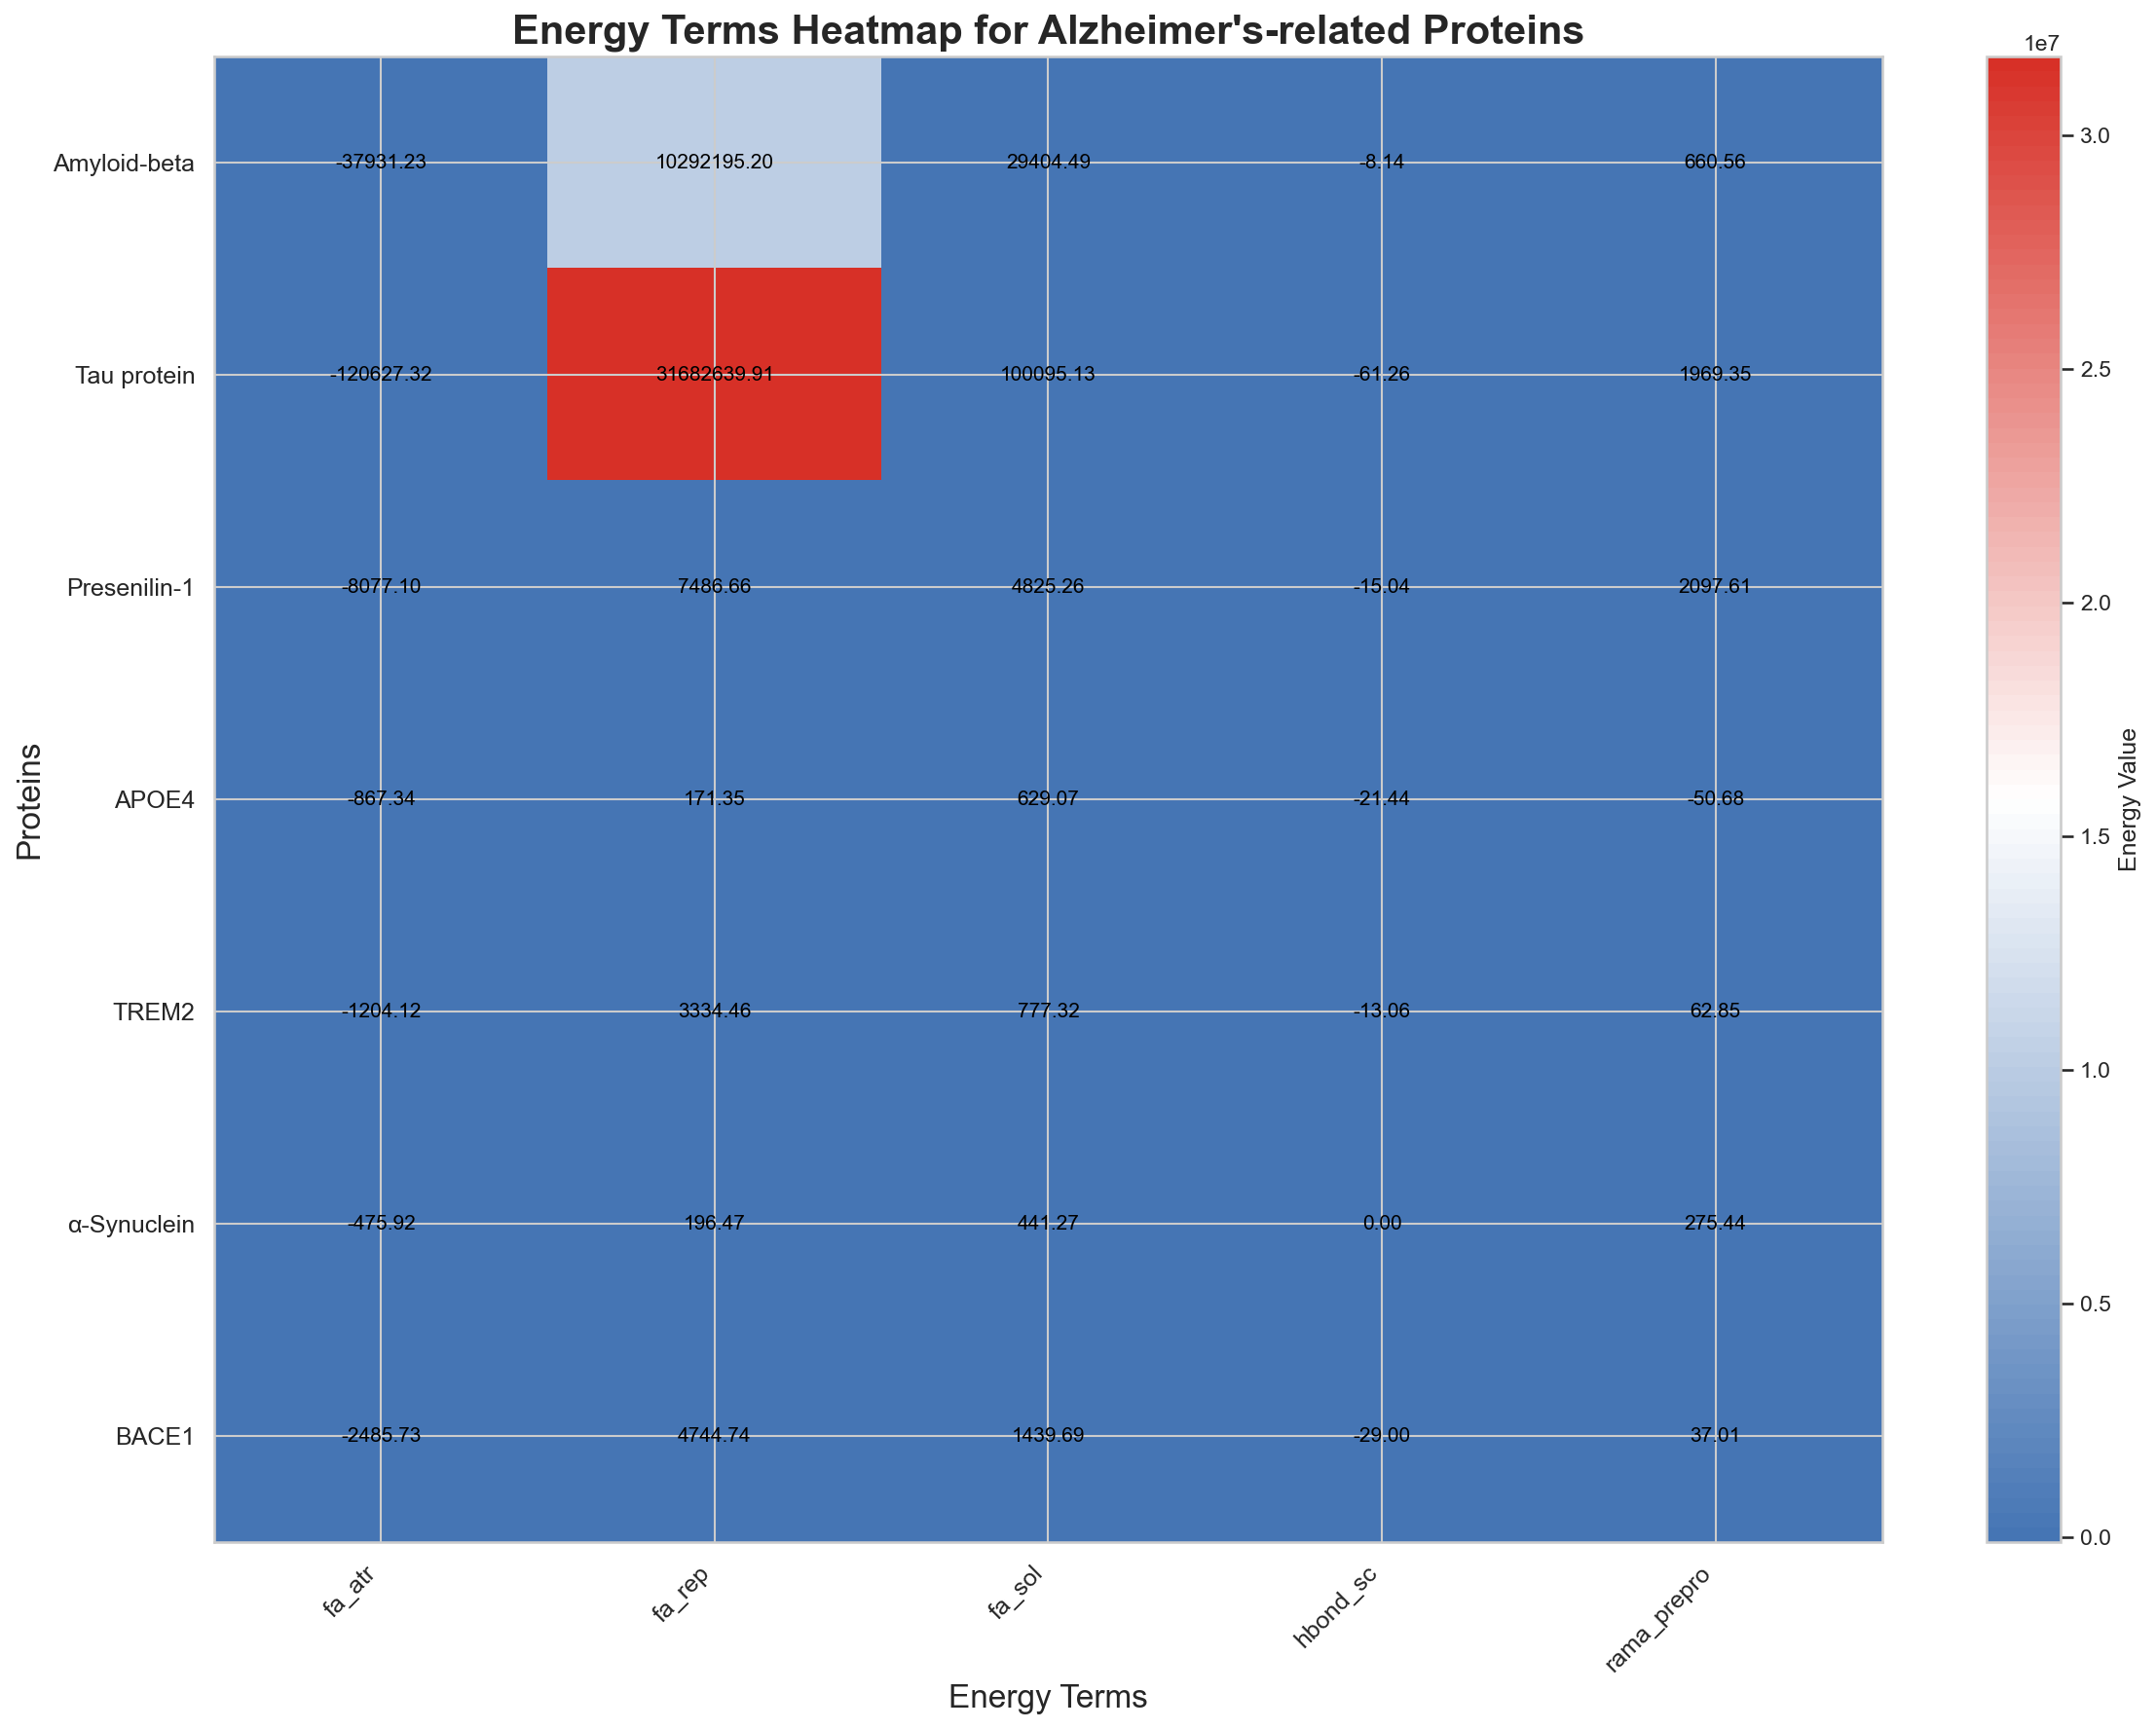

Interpretation:
This heatmap displays all the energy terms for each protein. Red indicates higher energy (less favorable), while blue indicates lower energy (more favorable).
[Add your specific interpretation based on the results]


In [15]:
# Energy Terms Heatmap
energy_terms = ['fa_atr', 'fa_rep', 'fa_sol', 'hbond_sc', 'rama_prepro']
plt.figure(figsize=(16, 12))

# Create a custom colormap
colors = ["#4575b4", "#ffffff", "#d73027"]  # Blue to White to Red
n_bins = 100
cmap = LinearSegmentedColormap.from_list("custom", colors, N=n_bins)

im = plt.imshow(df[energy_terms], cmap=cmap, aspect='auto')
plt.colorbar(im, label='Energy Value')

plt.title('Energy Terms Heatmap for Alzheimer\'s-related Proteins', fontsize=20, fontweight='bold')
plt.xlabel('Energy Terms', fontsize=16)
plt.ylabel('Proteins', fontsize=16)
plt.xticks(range(len(energy_terms)), energy_terms, rotation=45, ha='right', fontsize=12)
plt.yticks(range(len(df)), df['Protein'], fontsize=12)

for i in range(len(df)):
    for j in range(len(energy_terms)):
        text = plt.text(j, i, f'{df[energy_terms[j]].iloc[i]:.2f}',
                        ha="center", va="center", color="black", fontsize=10)

plt.tight_layout()
plt.show()

print("Interpretation:")
print("This heatmap displays all the energy terms for each protein. Red indicates higher energy (less favorable), while blue indicates lower energy (more favorable).")
print("[Add your specific interpretation based on the results]")

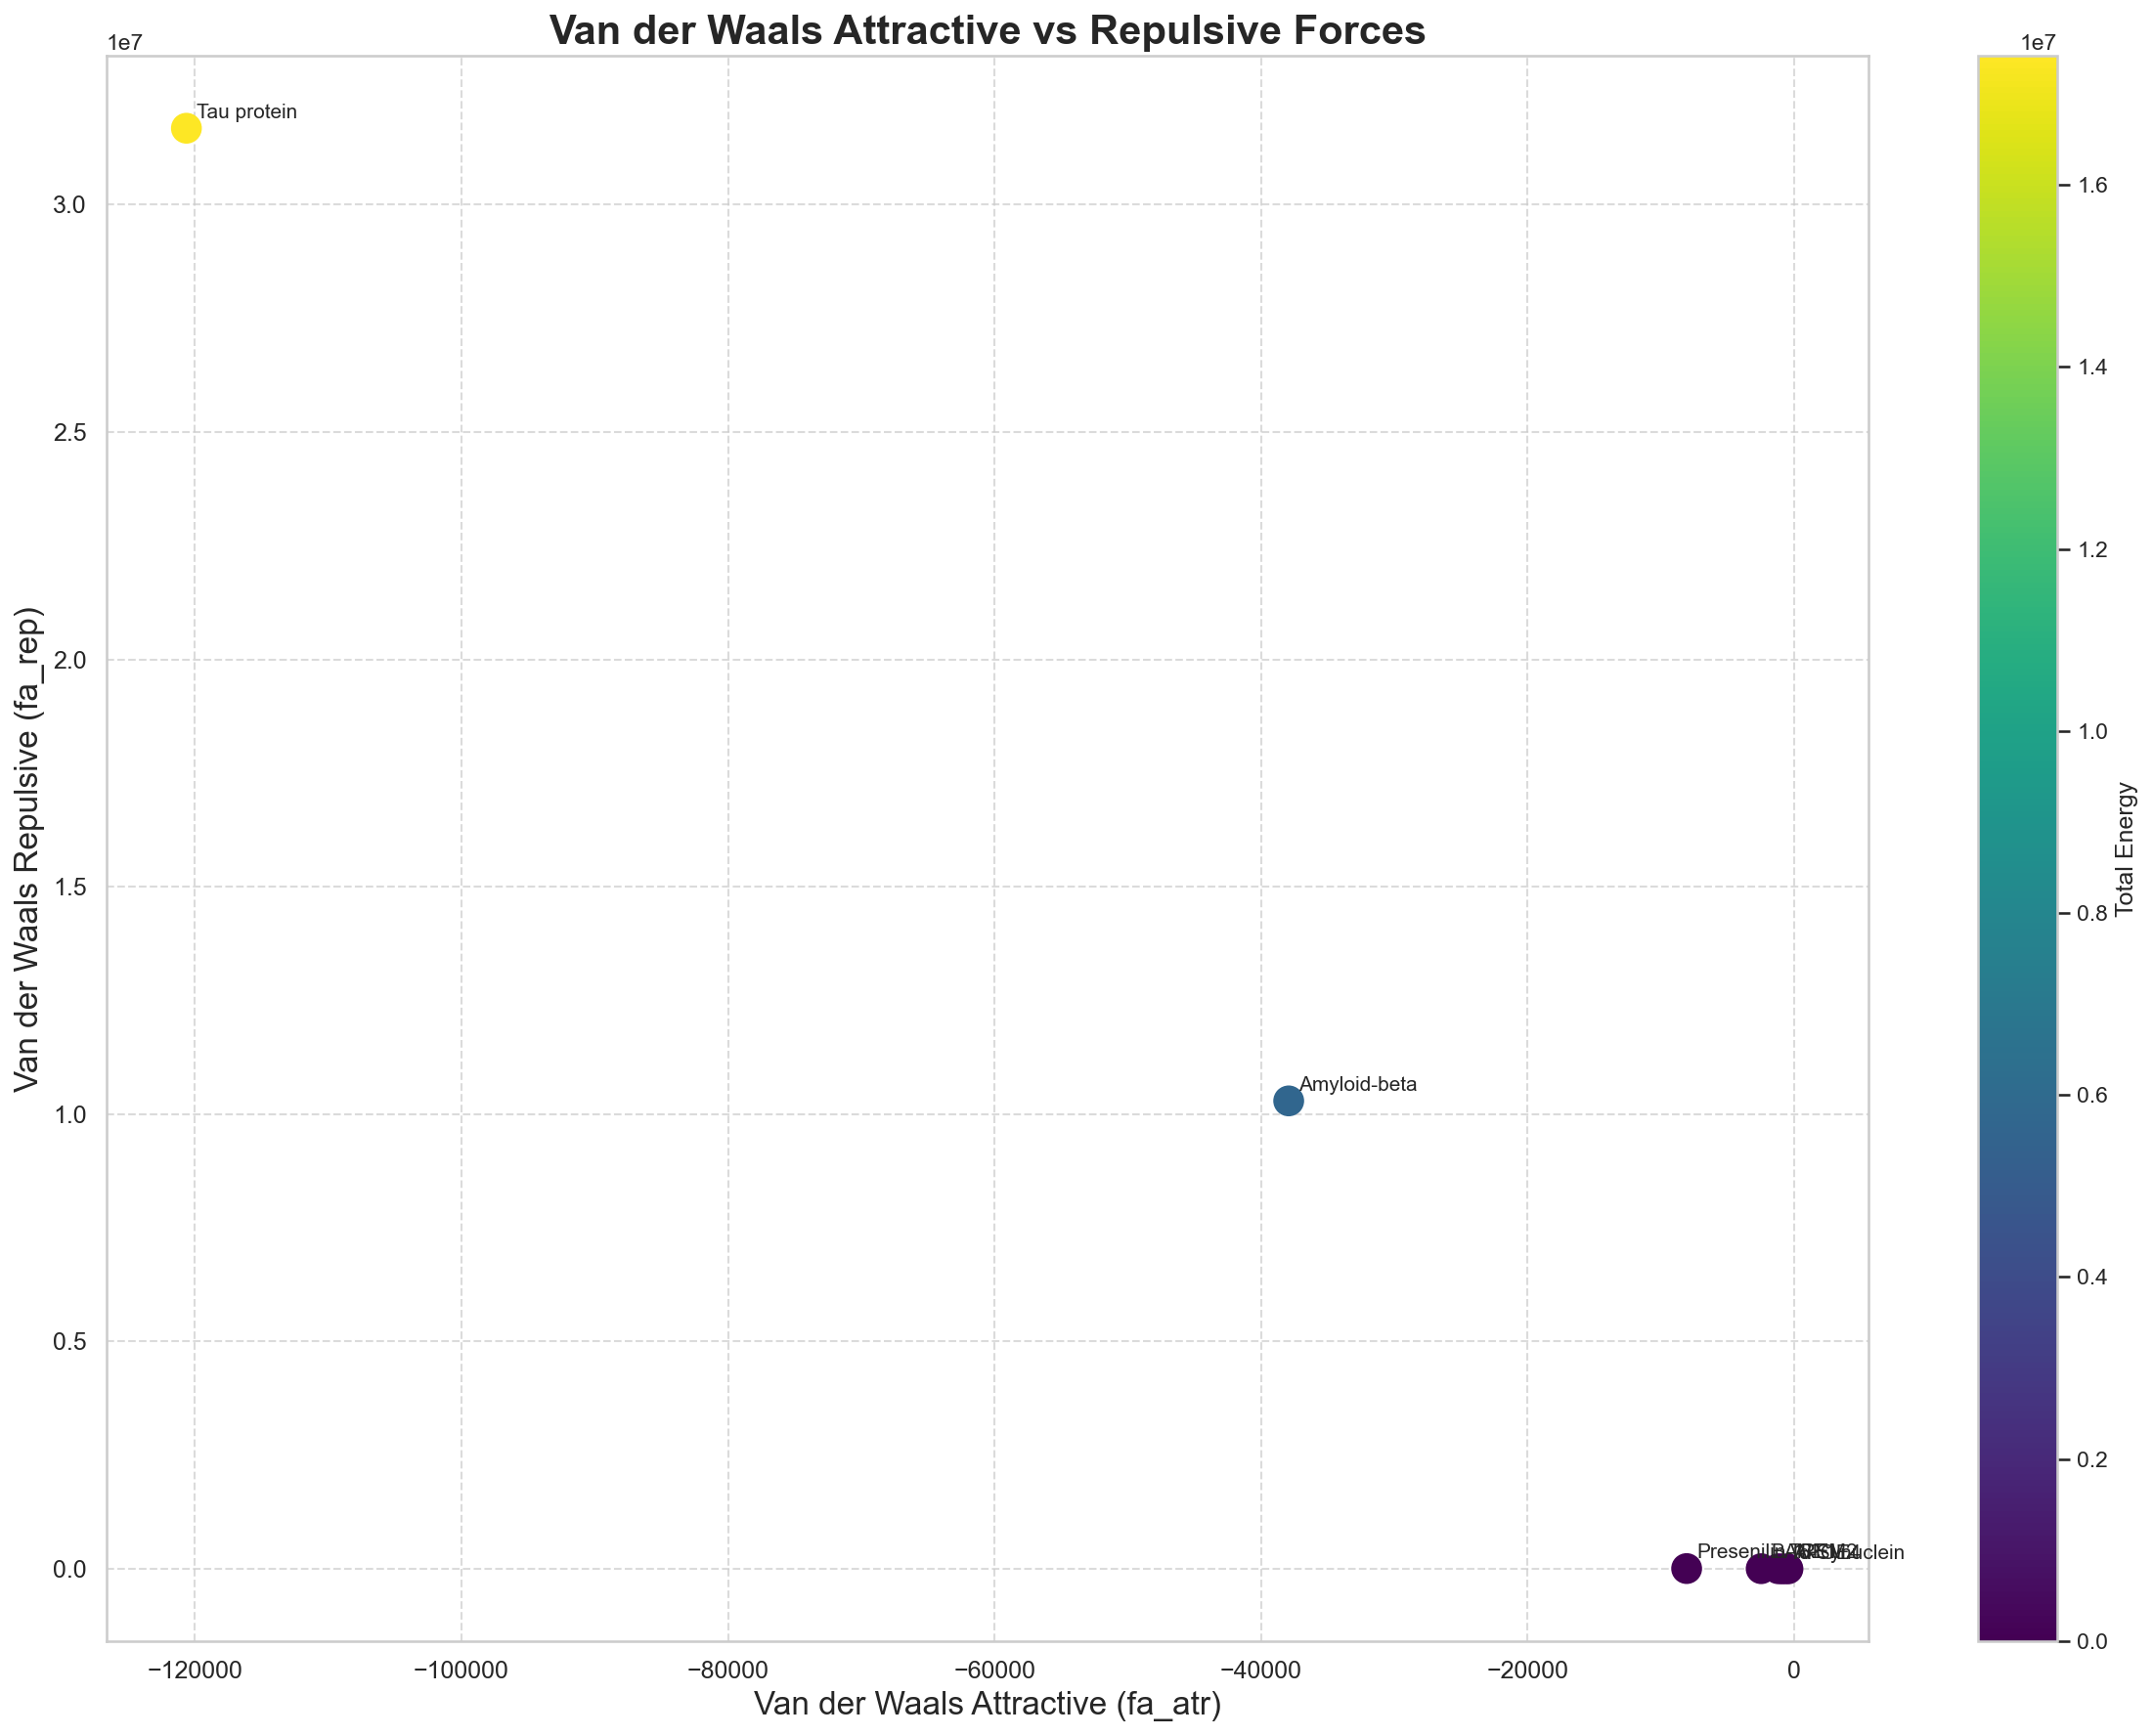

Interpretation:
This scatter plot compares the Van der Waals attractive forces (fa_atr) against the repulsive forces (fa_rep) for each protein.
The color of each point represents the total energy of the protein.
[Add your specific interpretation based on the results]


In [16]:
# Van der Waals Forces Scatter Plot
plt.figure(figsize=(16, 12))
scatter = plt.scatter(df['fa_atr'], df['fa_rep'], s=200, c=df['Total'], cmap='viridis')
plt.colorbar(scatter, label='Total Energy')

for i, row in df.iterrows():
    plt.annotate(row['Protein'], (row['fa_atr'], row['fa_rep']), 
                 xytext=(5, 5), textcoords='offset points', fontsize=10)

plt.title('Van der Waals Attractive vs Repulsive Forces', fontsize=20, fontweight='bold')
plt.xlabel('Van der Waals Attractive (fa_atr)', fontsize=16)
plt.ylabel('Van der Waals Repulsive (fa_rep)', fontsize=16)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

print("Interpretation:")
print("This scatter plot compares the Van der Waals attractive forces (fa_atr) against the repulsive forces (fa_rep) for each protein.")
print("The color of each point represents the total energy of the protein.")
print("[Add your specific interpretation based on the results]")

<Figure size 2400x1500 with 0 Axes>

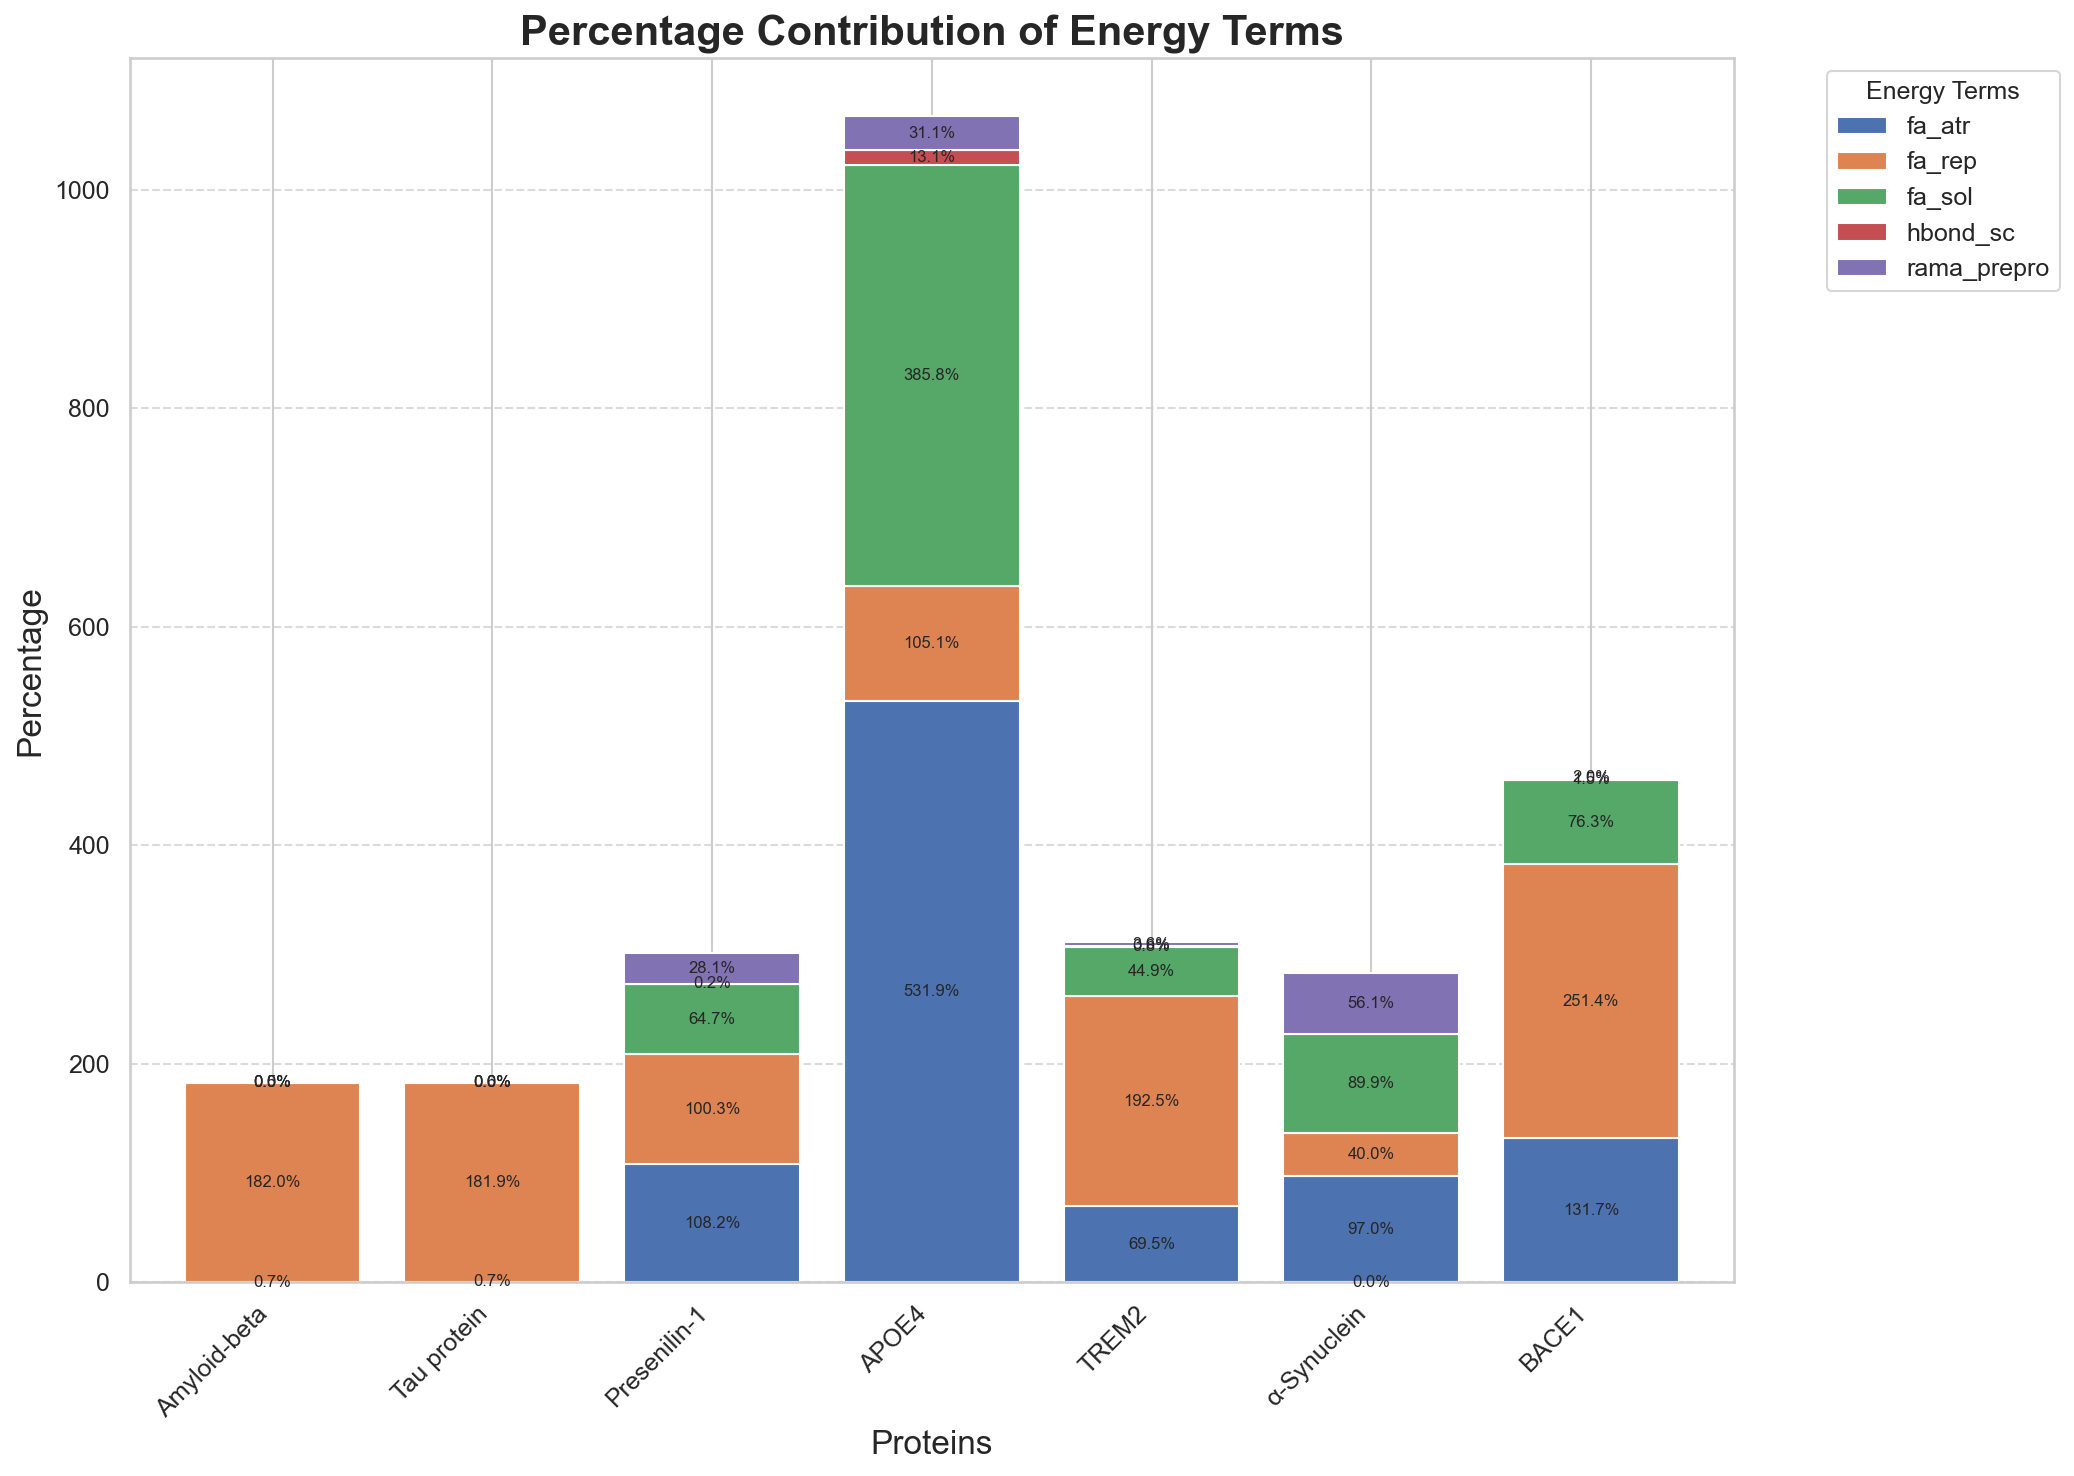

Interpretation:
This stacked bar chart shows the percentage contribution of each energy term to the total energy for each protein.
[Add your specific interpretation based on the results]


In [17]:
# Energy Term Contributions
energy_terms = ['fa_atr', 'fa_rep', 'fa_sol', 'hbond_sc', 'rama_prepro']
df_percentage = df[energy_terms].div(df['Total'].abs(), axis=0).abs() * 100

plt.figure(figsize=(16, 10))
ax = df_percentage.plot(kind='bar', stacked=True, width=0.8)

plt.title('Percentage Contribution of Energy Terms', fontsize=20, fontweight='bold')
plt.xlabel('Proteins', fontsize=16)
plt.ylabel('Percentage', fontsize=16)
plt.legend(title='Energy Terms', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=12)
plt.xticks(range(len(df)), df['Protein'], rotation=45, ha='right', fontsize=12)
plt.yticks(fontsize=12)

# Add percentage labels on the bars
for c in ax.containers:
    ax.bar_label(c, fmt='%.1f%%', label_type='center', fontsize=8)

plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

print("Interpretation:")
print("This stacked bar chart shows the percentage contribution of each energy term to the total energy for each protein.")
print("[Add your specific interpretation based on the results]")

In [18]:
# Conclusion
print("Conclusion:")
print("[Add your overall conclusions and insights from the analysis here]")
print("Consider discussing:")
print("1. Which proteins appear to be the most stable based on total energy?")
print("2. Are there any notable patterns in the energy terms across different proteins?")
print("3. How do the Van der Waals forces compare across the proteins, and what might this indicate about their structures?")
print("4. Are there any energy terms that consistently contribute more or less to the total energy across all proteins?")
print("5. What implications might these findings have for understanding Alzheimer's disease or for drug development?")

Conclusion:
[Add your overall conclusions and insights from the analysis here]
Consider discussing:
1. Which proteins appear to be the most stable based on total energy?
2. Are there any notable patterns in the energy terms across different proteins?
3. How do the Van der Waals forces compare across the proteins, and what might this indicate about their structures?
4. Are there any energy terms that consistently contribute more or less to the total energy across all proteins?
5. What implications might these findings have for understanding Alzheimer's disease or for drug development?


#### This code demonstrates how to integrate machine learning with PyRosetta to create a quick scoring function. It can significantly speed up initial screening of protein structures.

In [26]:
# File Path Tracking: Robust Machine Learning Integration with PyRosetta for Alzheimer's Protein Scoring
import pyrosetta
from sklearn.ensemble import RandomForestRegressor, IsolationForest
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
import os
from Bio import PDB
import pandas as pd

pyrosetta.init("-mute all")

alzheimer_pdb_ids = [
    "1IYT", "5OQV", "5FN2", "6NCO", "5ELI", "1XQ8", "5MCQ"
]

def download_pdb(pdb_id):
    pdb_list = PDB.PDBList()
    filename = pdb_list.retrieve_pdb_file(pdb_id, pdir='.', file_format='pdb')
    if os.path.exists(filename):
        return filename
    else:
        print(f"Failed to download {pdb_id}")
        return None

def is_aromatic(residue):
    return residue.name() in ['TYR', 'PHE', 'TRP', 'HIS']

def is_charged(residue):
    return residue.name() in ['ARG', 'LYS', 'ASP', 'GLU']

def is_hydrophobic(residue):
    return residue.name() in ['ALA', 'VAL', 'ILE', 'LEU', 'MET', 'PHE', 'TRP', 'PRO']

def extract_features(pose):
    return {
        'total_energy': pose.energies().total_energy(),
        'phi': pose.phi(1),
        'psi': pose.psi(1),
        'omega': pose.omega(1),
        'chi1': pose.chi(1, 1) if pose.residue(1).nchi() >= 1 else 0,
        'total_residue': pose.total_residue(),
        'glycine_count': pose.sequence().count('G'),
        'proline_count': pose.sequence().count('P'),
        'standard_aa_count': sum(aa.isupper() for aa in pose.sequence()),
        'charge': sum(is_charged(pose.residue(i)) for i in range(1, pose.total_residue() + 1)),
        'aromatic': sum(is_aromatic(pose.residue(i)) for i in range(1, pose.total_residue() + 1)),
        'hydrophobic': sum(is_hydrophobic(pose.residue(i)) for i in range(1, pose.total_residue() + 1))
    }

scorefxn = pyrosetta.create_score_function("ref2015")

data = []
file_paths = {}  # Store file paths for each PDB ID

for pdb_id in alzheimer_pdb_ids:
    filename = download_pdb(pdb_id)
    if filename and os.path.exists(filename):
        file_paths[pdb_id] = filename
        pose = pyrosetta.pose_from_pdb(filename)
        features = extract_features(pose)
        score = scorefxn(pose)
        features['score'] = score
        features['pdb_id'] = pdb_id
        data.append(features)
        print(f"PDB ID: {pdb_id}, Score: {score:.2f}, File: {filename}")
    else:
        print(f"Failed to process {pdb_id}")

df = pd.DataFrame(data)
print(df)

# Identify outliers
iso_forest = IsolationForest(contamination=0.1, random_state=42)
outliers = iso_forest.fit_predict(df[['score']])
df['is_outlier'] = outliers

# Remove outliers for training
df_clean = df[df['is_outlier'] == 1]

X = df_clean.drop(['score', 'pdb_id', 'is_outlier'], axis=1)
y = df_clean['score']

# Normalize features
scaler = RobustScaler()
X_scaled = scaler.fit_transform(X)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Train a Random Forest model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

def quick_score(pose):
    features = extract_features(pose)
    features_df = pd.DataFrame([features])
    scaled_features = scaler.transform(features_df)
    return model.predict(scaled_features)[0]

# Test the quick scoring function
for index, row in df.iterrows():
    pdb_id = row['pdb_id']
    actual_score = row['score']
    if pdb_id in file_paths:
        pose = pyrosetta.pose_from_pdb(file_paths[pdb_id])
        estimated_score = quick_score(pose)
        print(f"PDB ID: {pdb_id}")
        print(f"Estimated score: {estimated_score:.2f}")
        print(f"Actual score: {actual_score:.2f}")
        print(f"Difference: {abs(estimated_score - actual_score):.2f}")
        print(f"Outlier: {'Yes' if row['is_outlier'] == -1 else 'No'}")
        print("---")
    else:
        print(f"Skipping {pdb_id} - file not found")

# Evaluate the model
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse:.2f}")
print(f"R2 Score: {r2:.2f}")

# Feature importance
feature_importance = model.feature_importances_
for feature, importance in zip(X.columns, feature_importance):
    print(f"{feature} importance: {importance:.4f}")

┌──────────────────────────────────────────────────────────────────────────────┐
│                                 PyRosetta-4                                  │
│              Created in JHU by Sergey Lyskov and PyRosetta Team              │
│              (C) Copyright Rosetta Commons Member Institutions               │
│                                                                              │
│ NOTE: USE OF PyRosetta FOR COMMERCIAL PURPOSES REQUIRE PURCHASE OF A LICENSE │
│         See LICENSE.PyRosetta.md or email license@uw.edu for details         │
└──────────────────────────────────────────────────────────────────────────────┘
PyRosetta-4 2024 [Rosetta PyRosetta4.Release.python39.m1 2024.24+release.ca096dac4f43ee5ee195f87f3703a520fcf60cf9 2024-06-14T16:57:57] retrieved from: http://www.pyrosetta.org
core.init: Checking for fconfig files in pwd and ./rosetta/flags
core.init: Rosetta version: PyRosetta4.Release.python39.m1 r384 2024.24+release.ca096dac4f ca096dac4f43ee5ee195

Next Steps:

Investigate the 1IYT protein to understand its extreme score.
Implement log-transformation of the target variable.
Engineer new features based on protein structure and chemistry.
Try more sophisticated models like Gradient Boosting.
Implement cross-validation for more robust performance estimation.
If possible, expand the dataset with more protein examples.

This code shows how to use PyRosetta's membrane protein scoring capabilities, which can be crucial for analyzing proteins like presenilin in γ-secretase.

In [33]:
# Simplified PyRosetta Scoring of Presenilin-1 Structure
import pyrosetta
from Bio import PDB
import os

pyrosetta.init("-include_sugars -ignore_unrecognized_res -load_PDB_components false -mute all")

def download_pdb(pdb_id):
    pdb_list = PDB.PDBList()
    filename = pdb_list.retrieve_pdb_file(pdb_id, pdir='.', file_format='pdb')
    return filename

def score_protein(pdb_file):
    # Load the PDB file
    pose = pyrosetta.pose_from_pdb(pdb_file)
    
    # Create the REF2015 scoring function
    scorefxn = pyrosetta.create_score_function("ref2015")
    
    # Score the protein
    total_score = scorefxn(pose)
    
    return total_score

# Use Presenilin-1 structure (PDB ID: 6IYC)
pdb_id = "6IYC"

try:
    # Download the PDB file
    pdb_file = download_pdb(pdb_id)
    
    if os.path.exists(pdb_file):
        print(f"Successfully downloaded {pdb_file}")
        
        # Score the protein
        total_score = score_protein(pdb_file)

        print(f"Total score for Presenilin-1 (6IYC): {total_score:.2f}")
    else:
        print(f"Failed to download {pdb_id}")
except Exception as e:
    print(f"An error occurred: {str(e)}")
    print("Please ensure you have BioPython and PyRosetta installed correctly.")

┌──────────────────────────────────────────────────────────────────────────────┐
│                                 PyRosetta-4                                  │
│              Created in JHU by Sergey Lyskov and PyRosetta Team              │
│              (C) Copyright Rosetta Commons Member Institutions               │
│                                                                              │
│ NOTE: USE OF PyRosetta FOR COMMERCIAL PURPOSES REQUIRE PURCHASE OF A LICENSE │
│         See LICENSE.PyRosetta.md or email license@uw.edu for details         │
└──────────────────────────────────────────────────────────────────────────────┘
PyRosetta-4 2024 [Rosetta PyRosetta4.Release.python39.m1 2024.24+release.ca096dac4f43ee5ee195f87f3703a520fcf60cf9 2024-06-14T16:57:57] retrieved from: http://www.pyrosetta.org
core.init: Checking for fconfig files in pwd and ./rosetta/flags
core.init: Rosetta version: PyRosetta4.Release.python39.m1 r384 2024.24+release.ca096dac4f ca096dac4f43ee5ee195

This code does the following to improve on the previous code:

Score Breakdown: It breaks down the total score into individual energy terms, allowing you to see which interactions contribute most to the overall score.
Mutation Analysis: It introduces an optional mutation (in this case, changing residue 384 to Alanine) and compares the scores before and after mutation. You can easily modify the mutation site and type.
Structure Minimization: It performs a basic minimization of the structure to see if the score can be improved by small adjustments to the structure.
Membrane Context: It adds a membrane to the protein and scores it using a membrane-specific scoring function, which is more appropriate for Presenilin-1 as it's a membrane protein.
Comparative Analysis: It compiles all these results into a pandas DataFrame for easy comparison and saves the detailed results to a CSV file.

In [1]:
# Modular PyRosetta Analysis of Presenilin-1

#  Imports and Initialization
import pyrosetta
from pyrosetta import Pose
from pyrosetta.rosetta.protocols.minimization_packing import MinMover
from Bio import PDB
import os
import pandas as pd

pyrosetta.init("-include_sugars -ignore_unrecognized_res -load_PDB_components false -mute all")


┌──────────────────────────────────────────────────────────────────────────────┐
│                                 PyRosetta-4                                  │
│              Created in JHU by Sergey Lyskov and PyRosetta Team              │
│              (C) Copyright Rosetta Commons Member Institutions               │
│                                                                              │
│ NOTE: USE OF PyRosetta FOR COMMERCIAL PURPOSES REQUIRE PURCHASE OF A LICENSE │
│         See LICENSE.PyRosetta.md or email license@uw.edu for details         │
└──────────────────────────────────────────────────────────────────────────────┘
PyRosetta-4 2024 [Rosetta PyRosetta4.Release.python39.m1 2024.24+release.ca096dac4f43ee5ee195f87f3703a520fcf60cf9 2024-06-14T16:57:57] retrieved from: http://www.pyrosetta.org


In [2]:
#  Helper Functions
def download_pdb(pdb_id):
    pdb_list = PDB.PDBList()
    filename = pdb_list.retrieve_pdb_file(pdb_id, pdir='.', file_format='pdb')
    return filename

def get_score_breakdown(scorefxn, pose):
    score_breakdown = {}
    for score_type in scorefxn.get_nonzero_weighted_scoretypes():
        score_breakdown[score_type.name] = scorefxn.score_by_scoretype(pose, score_type)
    return score_breakdown

def mutate_residue(pose, position, new_aa):
    mutater = pyrosetta.rosetta.protocols.simple_moves.MutateResidue(position, new_aa)
    mutater.apply(pose)
    return pose

def minimize_structure(pose, scorefxn):
    min_mover = MinMover()
    min_mover.score_function(scorefxn)
    min_mover.apply(pose)
    return pose

In [3]:
 # Load and Analyze Wild-type Structure
pdb_id = "6IYC"
try:
    pdb_file = download_pdb(pdb_id)
    pose = Pose()
    pyrosetta.rosetta.core.import_pose.pose_from_file(pose, pdb_file)
    
    scorefxn = pyrosetta.create_score_function("ref2015")
    
    wt_score = scorefxn(pose)
    wt_breakdown = get_score_breakdown(scorefxn, pose)
    
    print(f"Wild-type Score: {wt_score:.2f}")
    print("\nWild-type Energy Breakdown:")
    for term, value in wt_breakdown.items():
        print(f"{term}: {value:.2f}")
except Exception as e:
    print(f"An error occurred: {str(e)}")


Structure exists: './pdb6iyc.ent' 
Wild-type Score: 4047.51

Wild-type Energy Breakdown:
fa_atr: -7507.15
fa_rep: 4283.08
fa_sol: 4375.53
fa_intra_rep: 18.52
fa_intra_sol_xover4: 259.18
lk_ball_wtd: -224.74
fa_elec: -1241.44
pro_close: 716.85
hbond_sr_bb: -489.00
hbond_lr_bb: -123.98
hbond_bb_sc: -65.32
hbond_sc: -23.77
dslf_fa13: 0.75
omega: 503.38
fa_dun: 2446.86
p_aa_pp: -59.15
yhh_planarity: 0.00
ref: 865.11
rama_prepro: 312.80


In [4]:
# Cell 4a: Helper Functions and Setup

import gc

def check_residue(pose, position):
    return 0 < position <= pose.total_residue()

def print_residue_info(pose, position):
    residue = pose.residue(position)
    print(f"Residue {position}: {residue.name()}")
    print(f"  Atom count: {residue.natoms()}")
    print(f"  Is protein: {residue.is_protein()}")

mutation_position = 384
mutation_aa = "A"

print(f"Original pose information:")
print(f"Total residues: {pose.total_residue()}")
print(f"Sequence start: {pose.sequence()[:20]}...")
print(f"Sequence end: ...{pose.sequence()[-20:]}")

if not check_residue(pose, mutation_position):
    print(f"Invalid mutation position: {mutation_position}")
else:
    print(f"\nOriginal residue information:")
    print_residue_info(pose, mutation_position)

# Force garbage collection
gc.collect()

Original pose information:
Total residues: 1355
Sequence start: NSVERKIYIPLNKTAPCVRL...
Sequence end: ...VGGVVIATVIVITLVMLKKK

Original residue information:
Residue 384: ASN
  Atom count: 14
  Is protein: True


0

In [5]:
# Cell 4b-1: Create new pose
try:
    mutated_pose = Pose()
    print("Created new empty pose")
except Exception as e:
    print(f"Error creating new pose: {str(e)}")
    import traceback
    traceback.print_exc()

Created new empty pose


In [6]:
# Cell 4b-2: Assign original pose
try:
    mutated_pose.assign(pose)
    print("Assigned original pose to new pose")
    print(f"New pose total residues: {mutated_pose.total_residue()}")
except Exception as e:
    print(f"Error assigning pose: {str(e)}")
    import traceback
    traceback.print_exc()


Assigned original pose to new pose
New pose total residues: 1355


In [7]:
# Cell 4b-3: Create mutate residue mover
try:
    print(f"\nAttempting to create MutateResidue mover")
    print(f"Mutation position: {mutation_position}")
    print(f"Mutation amino acid: {mutation_aa}")
    mutater = pyrosetta.rosetta.protocols.simple_moves.MutateResidue(mutation_position, mutation_aa)
    print("Created MutateResidue mover")
except Exception as e:
    print(f"Error creating MutateResidue mover: {str(e)}")
    import traceback
    traceback.print_exc()



Attempting to create MutateResidue mover
Mutation position: 384
Mutation amino acid: A
Created MutateResidue mover


In [12]:
# Cell 4b-4: Simplified Residue Mutation

from pyrosetta.rosetta.core.chemical import ChemicalManager, ResidueTypeSet
from pyrosetta.rosetta.core.conformation import ResidueFactory

# Dictionary to convert single-letter codes to three-letter codes
aa_dict = {
    'A': 'ALA', 'C': 'CYS', 'D': 'ASP', 'E': 'GLU', 'F': 'PHE',
    'G': 'GLY', 'H': 'HIS', 'I': 'ILE', 'K': 'LYS', 'L': 'LEU',
    'M': 'MET', 'N': 'ASN', 'P': 'PRO', 'Q': 'GLN', 'R': 'ARG',
    'S': 'SER', 'T': 'THR', 'V': 'VAL', 'W': 'TRP', 'Y': 'TYR'
}

try:
    print("\nPreparing for manual mutation")
    
    # Convert single-letter code to three-letter code
    mutation_aa_3letter = aa_dict.get(mutation_aa.upper())
    if mutation_aa_3letter is None:
        raise ValueError(f"Invalid amino acid code: {mutation_aa}")
    
    print(f"Mutation amino acid: {mutation_aa_3letter}")
    
    # Get the residue type set
    res_set = ChemicalManager.get_instance().residue_type_set("fa_standard")
    
    # Get the target residue type
    target_res_type = res_set.name_map(mutation_aa_3letter)
    
    if target_res_type is None:
        raise ValueError(f"Could not find residue type for: {mutation_aa_3letter}")
    
    print(f"Current residue at position {mutation_position}: {mutated_pose.residue(mutation_position).name()}")
    print(f"Attempting to mutate to: {target_res_type.name()}")
    
    # Create the new residue
    new_residue = ResidueFactory.create_residue(target_res_type)
    
    print("New residue created")
    
    # Replace the old residue with the new one
    mutated_pose.replace_residue(mutation_position, new_residue, True)
    
    print("Residue replaced")
    
    # Idealize the residue's geometry
    idealize = pyrosetta.rosetta.protocols.idealize.IdealizeMover()
    idealize.apply(mutated_pose)
    
    print("Residue geometry idealized")
    
    print("Manual mutation completed successfully")
    
    print(f"New residue at position {mutation_position}: {mutated_pose.residue(mutation_position).name()}")

except Exception as e:
    print(f"Error during manual mutation: {str(e)}")
    import traceback
    traceback.print_exc()

finally:
    print("\nPerforming cleanup")
    gc.collect()
    print("Cleanup completed")


Preparing for manual mutation
Mutation amino acid: ALA
Current residue at position 384: ALA
Attempting to mutate to: ALA
New residue created
Residue replaced
Residue geometry idealized
Manual mutation completed successfully
New residue at position 384: ALA

Performing cleanup
Cleanup completed
